In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
data_school = '/Users/vathanahim/Documents/UNCG-FALL2020/IAF603/IAF603_Assignment2/Chicago_Public_Schools_-_Progress_Report_Cards__2011-2012-v3.csv'
data_census = '/Users/vathanahim/Documents/UNCG-FALL2020/IAF603/IAF603_Assignment2/Census_Data_-_Selected_socioeconomic_indicators_in_Chicago__2008___2012-v2.csv'

# PART 1

In [2]:
df_census = pd.read_csv(data_census)
df_school = pd.read_csv(data_school)
pd.set_option("display.max_columns", 200)
pd.set_option("display.max_rows", 200)

# Census Data

In [3]:
df_census.head(5)

,COMMUNITY_AREA_NUMBER,COMMUNITY_AREA_NAME,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER_CAPITA_INCOME,HARDSHIP_INDEX
0,1.0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0
1,2.0,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0
2,3.0,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0
3,4.0,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0
4,5.0,North Center,0.3,7.5,5.2,4.5,26.2,57123,6.0


In [4]:
pd.set_option("display.max_rows", 100)
df_census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 9 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   COMMUNITY_AREA_NUMBER                         77 non-null     float64
 1   COMMUNITY_AREA_NAME                           78 non-null     object 
 2   PERCENT OF HOUSING CROWDED                    78 non-null     float64
 3   PERCENT HOUSEHOLDS BELOW POVERTY              78 non-null     float64
 4   PERCENT AGED 16+ UNEMPLOYED                   78 non-null     float64
 5   PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA  78 non-null     float64
 6   PERCENT AGED UNDER 18 OR OVER 64              78 non-null     float64
 7   PER_CAPITA_INCOME                             78 non-null     int64  
 8   HARDSHIP_INDEX                                77 non-null     float64
dtypes: float64(7), int64(1), object(1)
memory usage: 5.6+ KB


In [5]:
print("Dimension: " +str(df_census.shape))
df_census.isnull().sum()

Dimension: (78, 9)


COMMUNITY_AREA_NUMBER                           1
COMMUNITY_AREA_NAME                             0
PERCENT OF HOUSING CROWDED                      0
PERCENT HOUSEHOLDS BELOW POVERTY                0
PERCENT AGED 16+ UNEMPLOYED                     0
PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA    0
PERCENT AGED UNDER 18 OR OVER 64                0
PER_CAPITA_INCOME                               0
HARDSHIP_INDEX                                  1
dtype: int64

The df_census dataframe contains census data that shows the socio-economic conditions in Chicago. The three primary data
type in this data frame is float, int, and pandas object. This dataframe has 9 variables (columns) and 
78 observations (rows). When checking for the number of missing values in this dataframe, it was founded that columns
'COMMUNITY_AREA_NUMBER' and 'HARDSHIP_INDEX' have one missing value. 

# School Data

In [6]:
df_school.head(5)

,School ID,NAME_OF_SCHOOL,"Elementary, Middle, or High School",Street Address,City,State,ZIP Code,Phone Number,Link,Network Manager,Collaborative Name,Adequate Yearly Progress Made?,Track Schedule,CPS Performance Policy Status,CPS Performance Policy Level,HEALTHY_SCHOOL_CERTIFIED,Safety Icon,SAFETY_SCORE,Family Involvement Icon,Family Involvement Score,Environment Icon,Environment Score,Instruction Icon,Instruction Score,Leaders Icon,Leaders Score,Teachers Icon,Teachers Score,Parent Engagement Icon,Parent Engagement Score,Parent Environment Icon,Parent Environment Score,AVERAGE_STUDENT_ATTENDANCE,Rate of Misconducts (per 100 students),Average Teacher Attendance,Individualized Education Program Compliance Rate,Pk-2 Literacy %,Pk-2 Math %,Gr3-5 Grade Level Math %,Gr3-5 Grade Level Read %,Gr3-5 Keep Pace Read %,Gr3-5 Keep Pace Math %,Gr6-8 Grade Level Math %,Gr6-8 Grade Level Read %,Gr6-8 Keep Pace Math%,Gr6-8 Keep Pace Read %,Gr-8 Explore Math %,Gr-8 Explore Read %,ISAT Exceeding Math %,ISAT Exceeding Reading %,ISAT Value Add Math,ISAT Value Add Read,ISAT Value Add Color Math,ISAT Value Add Color Read,Students Taking Algebra %,Students Passing Algebra %,9th Grade EXPLORE (2009),9th Grade EXPLORE (2010),10th Grade PLAN (2009),10th Grade PLAN (2010),Net Change EXPLORE and PLAN,11th Grade Average ACT (2011),Net Change PLAN and ACT,College Eligibility %,Graduation Rate %,College Enrollment Rate %,COLLEGE_ENROLLMENT,General Services Route,Freshman on Track Rate %,X_COORDINATE,Y_COORDINATE,Latitude,Longitude,COMMUNITY_AREA_NUMBER,COMMUNITY_AREA_NAME,Ward,Police District,Location
0,610038,Abraham Lincoln Elementary School,ES,615 W Kemper Pl,Chicago,IL,60614,(773) 534-5720,http://schoolreports.cps.edu/SchoolProgressRep...,Fullerton Elementary Network,NORTH-NORTHWEST SIDE COLLABORATIVE,No,Standard,Not on Probation,Level 1,Yes,Very Strong,99.0,Very Strong,99,Strong,74.0,Strong,66.0,Strong,65,Strong,70,Strong,56,Average,47,96.00%,2.0,96.40%,95.80%,80.1,43.3,89.6,84.9,60.7,62.6,81.9,85.2,52,62.4,66.3,77.9,69.7,64.4,0.2,0.9,Yellow,Green,67.1,54.5,NDA,NDA,NDA,NDA,NDA,NDA,NDA,NDA,NDA,NDA,813,33,NDA,1171699.458,1915829.428,41.924497,-87.644522,7,LINCOLN PARK,43,18,"(41.92449696, -87.64452163)"
1,610281,Adam Clayton Powell Paideia Community Academy ...,ES,7511 S South Shore Dr,Chicago,IL,60649,(773) 535-6650,http://schoolreports.cps.edu/SchoolProgressRep...,Skyway Elementary Network,SOUTH SIDE COLLABORATIVE,No,Track_E,Not on Probation,Level 1,No,Average,54.0,Strong,66,Strong,74.0,Very Strong,84.0,Strong,63,Strong,76,Weak,46,Average,50,95.60%,15.7,95.30%,100.00%,62.4,51.7,21.9,15.1,29,42.8,38.5,27.4,44.8,42.7,14.1,34.4,16.8,16.5,0.7,1.4,Green,Green,17.2,27.3,NDA,NDA,NDA,NDA,NDA,NDA,NDA,NDA,NDA,NDA,521,46,NDA,1196129.985,1856209.466,41.760324,-87.556736,43,SOUTH SHORE,7,4,"(41.76032435, -87.55673627)"
2,610185,Adlai E Stevenson Elementary School,ES,8010 S Kostner Ave,Chicago,IL,60652,(773) 535-2280,http://schoolreports.cps.edu/SchoolProgressRep...,Midway Elementary Network,SOUTHWEST SIDE COLLABORATIVE,No,Standard,Not on Probation,Level 2,No,Strong,61.0,NDA,NDA,Average,50.0,Weak,36.0,NDA,NDA,NDA,NDA,Average,47,Weak,41,95.70%,2.3,94.70%,98.30%,53.7,26.6,38.3,34.7,43.7,57.3,48.8,39.2,46.8,44,7.5,21.9,18.3,15.5,-0.9,-1.0,Red,Red,NDA,NDA,NDA,NDA,NDA,NDA,NDA,NDA,NDA,NDA,NDA,NDA,1324,44,NDA,1148427.165,1851012.215,41.747111,-87.731702,70,ASHBURN,13,8,"(41.74711093, -87.73170248)"
3,609993,Agustin Lara Elementary Academy,ES,4619 S Wolcott Ave,Chicago,IL,60609,(773) 535-4389,http://schoolreports.cps.edu/SchoolProgressRep...,Pershing Elementary Network,SOUTHWEST SIDE COLLABORATIVE,No,Track_E,Not on Probation,Level 1,No,Average,56.0,Average,44,Average,45.0,Weak,37.0,Strong,65,Average,48,Average,53,Strong,58,95.50%,10.4,95.80%,100.00%,76.9,NDA,26,24.7,61.8,49.7,39.2,27.2,69.7,60.6,9.1,18.2,11.1,9.6,0.9,2.4,Green,Green,42.9,25,NDA,NDA,NDA,NDA,NDA,NDA,NDA,NDA,NDA,NDA,556,42,NDA,1164504.290,1873959.199,41.809757,-87.672145,61,NEW CITY,20,9,"(41.8097569, -87.6721

In [7]:
df_school.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566 entries, 0 to 565
Data columns (total 78 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   School ID                                          566 non-null    int64  
 1   NAME_OF_SCHOOL                                     566 non-null    object 
 2   Elementary, Middle, or High School                 566 non-null    object 
 3   Street Address                                     566 non-null    object 
 4   City                                               566 non-null    object 
 5   State                                              566 non-null    object 
 6   ZIP Code                                           566 non-null    int64  
 7   Phone Number                                       566 non-null    object 
 8   Link                                               565 non-null    object 
 9   Network Ma

In [8]:
print("Dimension: " +str(df_school.shape))
df_school.isnull().sum()

Dimension: (566, 78)


School ID                                             0
NAME_OF_SCHOOL                                        0
Elementary, Middle, or High School                    0
Street Address                                        0
City                                                  0
State                                                 0
ZIP Code                                              0
Phone Number                                          0
Link                                                  1
Network Manager                                       0
Collaborative Name                                    0
Adequate Yearly Progress Made?                        0
Track Schedule                                        0
CPS Performance Policy Status                         0
CPS Performance Policy Level                          0
HEALTHY_SCHOOL_CERTIFIED                              0
Safety Icon                                           0
SAFETY_SCORE                                    

The df_school dataframe contains data about public school assesment in the Chicago area. This dataframe has float, int 
and pandas object data types. df_school dataframe consists of 78 variables (columns) and 566 observations (rows). This 
dataframe has missing values in columns: "LINK", "SAFETY_SCORE", "ENVIRONMENT SCORE", "INSTRUCTION SCORE", "AVERAGE_STUDENT_ATTENDANCE","ISAT Exceeding Math %", 'ISAT Exceeding Reading %', "ISAT Value Add Math", and "ISAT Value Add Read". This dataset has no variables with respective to time as each observation information is dependend on the School ID.

In [9]:
l = ['School ID','COMMUNITY_AREA_NUMBER','NAME_OF_SCHOOL','SAFETY_SCORE','Environment Score','Instruction Score','Parent Engagement Score',
     'Average Teacher Attendance','COMMUNITY_AREA_NAME','College Enrollment Rate %']
df_school_selected = df_school[l]

In [10]:
df_school_selected.head(10)

,School ID,COMMUNITY_AREA_NUMBER,NAME_OF_SCHOOL,SAFETY_SCORE,Environment Score,Instruction Score,Parent Engagement Score,Average Teacher Attendance,COMMUNITY_AREA_NAME,College Enrollment Rate %
0,610038,7,Abraham Lincoln Elementary School,99.0,74.0,66.0,56,96.40%,LINCOLN PARK,NDA
1,610281,43,Adam Clayton Powell Paideia Community Academy ...,54.0,74.0,84.0,46,95.30%,SOUTH SHORE,NDA
2,610185,70,Adlai E Stevenson Elementary School,61.0,50.0,36.0,47,94.70%,ASHBURN,NDA
3,609993,61,Agustin Lara Elementary Academy,56.0,45.0,37.0,53,95.80%,NEW CITY,NDA
4,610513,34,Air Force Academy High School,49.0,60.0,55.0,53,96.90%,ARMOUR SQUARE,NDA
5,610212,14,Albany Park Multicultural Academy,66.0,66.0,71.0,46,96.90%,ALBANY PARK,NDA
6,609720,5,Albert G Lane Technical High School,88.0,62.0,52.0,NDA,96.20%,NORTH CENTER,79.8
7,610342,24,Albert R Sabin Elementary Magnet School,67.0,30.0,18.0,NDA,95.00%,WEST TOWN,NDA
8,610524,5,Alcott High School for the Humanities,70.0,67.0,51.0,57,96.90%,NORTH CENTER,NDA
9,610209,14,Alessandro Volta Elementary School,43.0,28.0,37.0,51,95.90%,ALBANY PARK,NDA


In [11]:
df_school_selected.isnull().sum()

School ID                      0
COMMUNITY_AREA_NUMBER          0
NAME_OF_SCHOOL                 0
SAFETY_SCORE                  53
Environment Score             53
Instruction Score             53
Parent Engagement Score        0
Average Teacher Attendance     0
COMMUNITY_AREA_NAME            0
College Enrollment Rate %      0
dtype: int64

List-wise deletion was used for schools that doesn't have 'Parent Engagement Score'. However, for 
'College Enrollment Rate', we will not be deleting the missing values 
since only high schools have them and pandas operations will be intrinsically skip those missing values. Instead it will be replace with 'nan. 'SAFETY_SCORE','Environment Score','Instruction Score' missing values will be replace with the mean value of the population for each of their respective column because this is not dependent on the level of education (elementary,middle,high).

In [12]:
#drops rows that conatins missing value for parent Engagement Score (list-wise deletion)
df_school_selected = df_school_selected[~df_school_selected['Parent Engagement Score'].isin(['NDA'])]
df_school_selected['Parent Engagement Score'].isnull().sum()

0

In [13]:
#replacing NDA with nan
df_school_selected = df_school_selected.replace('NDA', np.nan)

In [14]:
#replacing nan with mean for 'SAFETY_SCORE','Environment Score','Instruction Score'
mean_list = ['SAFETY_SCORE','Environment Score','Instruction Score']

for i in mean_list:
    mean = int(df_school_selected[i].mean())
    df_school_selected[i] = df_school_selected[i].replace(np.nan, mean)

In [15]:
df_school_selected.isnull().sum()

School ID                       0
COMMUNITY_AREA_NUMBER           0
NAME_OF_SCHOOL                  0
SAFETY_SCORE                    0
Environment Score               0
Instruction Score               0
Parent Engagement Score         0
Average Teacher Attendance      0
COMMUNITY_AREA_NAME             0
College Enrollment Rate %     404
dtype: int64

# Part 2

In [16]:
import sqlite3

In [17]:
assign2db = "assign2.db"
conn = sqlite3.connect(assign2db)
print(conn)

In [18]:
conn = sqlite3.connect(assign2db)
cursor = conn.cursor()
#Drop public school table if it exits
cursor.execute("DROP TABLE IF EXISTS `PUBLIC_SCHOOL`")
print("Table dropped")
conn.close()

Table dropped


Community area number or community area name can serve as foreign key but it's prefered that a non-string data type is foreign key

In [19]:
#create public school table with appropriate fields
conn = sqlite3.connect(assign2db)
cursor = conn.cursor()
try:
    cursor.execute("""
    CREATE TABLE PUBLIC_SCHOOL (
    SCHOOL_ID INTEGER PRIMARY KEY,
    COMMUNITY_AREA_NUMBER INTEGER,
    NAME_OF_SCHOOL TEXT NOT NULL,
    SAFETY_SCORE FLOAT DEFAULT 0,
    Environment_Score FLOAT DEFAULT 0,
    Instruction_Score FLOAT DEFAULT 0,
    Parent_Engagement_Score INT DEFAULT 0,
    Average_Teacher_Attendance FLOAT DEFAULT 0,
    COMMUNITY_AREA_NAME TEXT NOT NULL,
    College_Enrollment_Rate_perc FLOAT DEFAULT 0
    );
    """)
    print("Success Creation")
except Exception as e:
    print(str(e))
    print("Table creation failed")
finally:
    conn.close()

Success Creation


In [20]:
df_school_selected.isnull().sum()

School ID                       0
COMMUNITY_AREA_NUMBER           0
NAME_OF_SCHOOL                  0
SAFETY_SCORE                    0
Environment Score               0
Instruction Score               0
Parent Engagement Score         0
Average Teacher Attendance      0
COMMUNITY_AREA_NAME             0
College Enrollment Rate %     404
dtype: int64

In [21]:
#convert to list so it can be inserted into table
school_list = df_school_selected.values.tolist()
school_list

[[610038,
  7,
  'Abraham Lincoln Elementary School',
  99.0,
  74.0,
  66.0,
  '56',
  '96.40%',
  'LINCOLN PARK',
  nan],
 [610281,
  43,
  'Adam Clayton Powell Paideia Community Academy Elementary School',
  54.0,
  74.0,
  84.0,
  '46',
  '95.30%',
  'SOUTH SHORE',
  nan],
 [610185,
  70,
  'Adlai E Stevenson Elementary School',
  61.0,
  50.0,
  36.0,
  '47',
  '94.70%',
  'ASHBURN',
  nan],
 [609993,
  61,
  'Agustin Lara Elementary Academy',
  56.0,
  45.0,
  37.0,
  '53',
  '95.80%',
  'NEW CITY',
  nan],
 [610513,
  34,
  'Air Force Academy High School',
  49.0,
  60.0,
  55.0,
  '53',
  '96.90%',
  'ARMOUR SQUARE',
  nan],
 [610212,
  14,
  'Albany Park Multicultural Academy',
  66.0,
  66.0,
  71.0,
  '46',
  '96.90%',
  'ALBANY PARK',
  nan],
 [610524,
  5,
  'Alcott High School for the Humanities',
  70.0,
  67.0,
  51.0,
  '57',
  '96.90%',
  'NORTH CENTER',
  nan],
 [610209,
  14,
  'Alessandro Volta Elementary School',
  43.0,
  28.0,
  37.0,
  '51',
  '95.90%',
  'ALBA

In [22]:
#inserting the fields into the table
conn = sqlite3.connect(assign2db)
cursor = conn.cursor()
try:
    cursor.executemany("""
    INSERT INTO PUBLIC_SCHOOL (SCHOOL_ID, COMMUNITY_AREA_NUMBER, NAME_OF_SCHOOL, SAFETY_SCORE, 
    Environment_Score, Instruction_Score, Parent_Engagement_Score, Average_Teacher_Attendance, COMMUNITY_AREA_NAME,
    College_Enrollment_Rate_perc)
    VALUES (?,?,?,?,?,?,?,?,?,?)
    """, school_list)
    conn.commit()
    print("Insert Successfully")
except Exception as e:
    print(str(e))
    print("Insert failed")
finally:
    conn.close()

Insert Successfully


In [23]:
#test to see if value is inserted properly
conn = sqlite3.connect(assign2db)
cursor = conn.cursor()
cursor.execute("SELECT * FROM PUBLIC_SCHOOL")
result = cursor.fetchall()
conn.close
for i in result:
    print(i)

(609679, 19, 'Charles Allen Prosser Career Academy High School', 59.0, 53.0, 51.0, 46, '94.40%', 'BELMONT CRAGIN', 58.0)
(609682, 61, 'Ellen H Richards Career Academy High School', 30.0, 32.0, 19.0, 43, '95.70%', 'NEW CITY', 43.1)
(609693, 23, 'George Westinghouse High School', 74.0, 77.0, 80.0, 54, '96.80%', 'HUMBOLDT PARK', None)
(609694, 62, 'John Hancock College Preparatory High School', 51.0, 44.0, 41.0, 50, '95.90%', 'WEST ELSDON', 45.9)
(609695, 4, 'Roald Amundsen High School', 51.0, 43.0, 42.0, 43, '95.90%', 'LINCOLN SQUARE', 49.1)
(609698, 70, 'William J Bogan High School', 20.0, 18.0, 29.0, 41, '94.30%', 'ASHBURN', 50.0)
(609702, 28, 'Richard T Crane Technical Preparatory High School', 43.0, 50.0, 48.0, 47, '93.90%', 'NEAR WEST SIDE', 32.6)
(609711, 67, 'William Rainey Harper High School', 22.0, 39.0, 42.0, 49, '94.70%', 'WEST ENGLEWOOD', 40.3)
(609719, 6, 'Lake View High School', 64.0, 52.0, 43.0, 49, '96.20%', 'LAKE VIEW', 62.8)
(609726, 49, 'Gwendolyn Brooks College Prepar

In [24]:
#cleaning up data set for census so we can match based on community area number for later on 
df_census = df_census.fillna(0)
df_census.isnull().sum()
df_census['COMMUNITY_AREA_NUMBER'] = df_census['COMMUNITY_AREA_NUMBER'].astype(int)

In [25]:
conn = sqlite3.connect(assign2db)
cursor = conn.cursor()
#Drop public school table if it exits
cursor.execute("DROP TABLE IF EXISTS `CENSUS`")
print("Table dropped")
conn.close()

Table dropped


In [26]:
conn = sqlite3.connect(assign2db)
cursor = conn.cursor()
try:
    cursor.execute("""
    CREATE TABLE CENSUS (
    COMMUNITY_AREA_NUMBER INTEGER DEFAULT 0 PRIMARY KEY,
    COMMUNITY_AREA_NAME TEXT NOT NULL,
    PERCENT_OF_HOUSING_CROWDED FLOAT DEFAULT 0,
    PERCENT_HOUSEHOLDS_BELOW_POVERTY FLOAT DEFAULT 0,
    PERCENT_AGED_16_UNEMPLOYED FLOAT DEFAULT 0,
    PERCENT_AGED_25_WITHOUT_HIGH_SCHOOL_DIPLOMA FLOAT DEFAULT 0,
    PERCENT_AGED_UNDER_18_OR_OVER_64 FLOAT DEFAULT 0,
    PER_CAPITA_INCOME INT DEFAULT 0,
    HARDSHIP_INDEX FLOAT DEFAULT 0
    );
    """)
    print("Success Creation")
except Exception as e:
    print(str(e))
    print("Table creation failed")
finally:
    conn.close()

Success Creation


In [27]:
census_list = df_census.values.tolist()
census_list

[[1, 'Rogers Park', 7.7, 23.6, 8.7, 18.2, 27.5, 23939, 39.0],
 [2, 'West Ridge', 7.8, 17.2, 8.8, 20.8, 38.5, 23040, 46.0],
 [3, 'Uptown', 3.8, 24.0, 8.9, 11.8, 22.2, 35787, 20.0],
 [4, 'Lincoln Square', 3.4, 10.9, 8.2, 13.4, 25.5, 37524, 17.0],
 [5, 'North Center', 0.3, 7.5, 5.2, 4.5, 26.2, 57123, 6.0],
 [6, 'Lake View', 1.1, 11.4, 4.7, 2.6, 17.0, 60058, 5.0],
 [7, 'Lincoln Park', 0.8, 12.3, 5.1, 3.6, 21.5, 71551, 2.0],
 [8, 'Near North Side', 1.9, 12.9, 7.0, 2.5, 22.6, 88669, 1.0],
 [9, 'Edison Park', 1.1, 3.3, 6.5, 7.4, 35.3, 40959, 8.0],
 [10, 'Norwood Park', 2.0, 5.4, 9.0, 11.5, 39.5, 32875, 21.0],
 [11, 'Jefferson Park', 2.7, 8.6, 12.4, 13.4, 35.5, 27751, 25.0],
 [12, 'Forest Glen', 1.1, 7.5, 6.8, 4.9, 40.5, 44164, 11.0],
 [13, 'North Park', 3.9, 13.2, 9.9, 14.4, 39.0, 26576, 33.0],
 [14, 'Albany Park', 11.3, 19.2, 10.0, 32.9, 32.0, 21323, 53.0],
 [15, 'Portage Park', 4.1, 11.6, 12.6, 19.3, 34.0, 24336, 35.0],
 [16, 'Irving Park', 6.3, 13.1, 10.0, 22.4, 31.6, 27249, 34.0],
 [17, '

In [28]:
#inserting the fields into the table
conn = sqlite3.connect(assign2db)
cursor = conn.cursor()
try:
    cursor.executemany("""
    INSERT INTO CENSUS (COMMUNITY_AREA_NUMBER,
    COMMUNITY_AREA_NAME,
    PERCENT_OF_HOUSING_CROWDED,
    PERCENT_HOUSEHOLDS_BELOW_POVERTY,
    PERCENT_AGED_16_UNEMPLOYED,
    PERCENT_AGED_25_WITHOUT_HIGH_SCHOOL_DIPLOMA,
    PERCENT_AGED_UNDER_18_OR_OVER_64,
    PER_CAPITA_INCOME,
    HARDSHIP_INDEX)
    VALUES (?,?,?,?,?,?,?,?,?)
    """, census_list)
    conn.commit()
    print("Insert Successfully")
except Exception as e:
    print(str(e))
    print("Insert failed")
finally:
    conn.close()

Insert Successfully


In [29]:
conn = sqlite3.connect(assign2db)
cursor = conn.cursor()
cursor.execute("SELECT * FROM CENSUS")
result = cursor.fetchall()
conn.close()

In [30]:
for i in result:
    print(i)

(0, 'CHICAGO', 4.7, 19.7, 12.9, 19.5, 33.5, 28202, 0.0)
(1, 'Rogers Park', 7.7, 23.6, 8.7, 18.2, 27.5, 23939, 39.0)
(2, 'West Ridge', 7.8, 17.2, 8.8, 20.8, 38.5, 23040, 46.0)
(3, 'Uptown', 3.8, 24.0, 8.9, 11.8, 22.2, 35787, 20.0)
(4, 'Lincoln Square', 3.4, 10.9, 8.2, 13.4, 25.5, 37524, 17.0)
(5, 'North Center', 0.3, 7.5, 5.2, 4.5, 26.2, 57123, 6.0)
(6, 'Lake View', 1.1, 11.4, 4.7, 2.6, 17.0, 60058, 5.0)
(7, 'Lincoln Park', 0.8, 12.3, 5.1, 3.6, 21.5, 71551, 2.0)
(8, 'Near North Side', 1.9, 12.9, 7.0, 2.5, 22.6, 88669, 1.0)
(9, 'Edison Park', 1.1, 3.3, 6.5, 7.4, 35.3, 40959, 8.0)
(10, 'Norwood Park', 2.0, 5.4, 9.0, 11.5, 39.5, 32875, 21.0)
(11, 'Jefferson Park', 2.7, 8.6, 12.4, 13.4, 35.5, 27751, 25.0)
(12, 'Forest Glen', 1.1, 7.5, 6.8, 4.9, 40.5, 44164, 11.0)
(13, 'North Park', 3.9, 13.2, 9.9, 14.4, 39.0, 26576, 33.0)
(14, 'Albany Park', 11.3, 19.2, 10.0, 32.9, 32.0, 21323, 53.0)
(15, 'Portage Park', 4.1, 11.6, 12.6, 19.3, 34.0, 24336, 35.0)
(16, 'Irving Park', 6.3, 13.1, 10.0, 22.4, 31

In [31]:
conn = sqlite3.connect(assign2db)
cursor = conn.cursor()
cursor.execute("SELECT COUNT(*) FROM PUBLIC_SCHOOL")
public_school_count = cursor.fetchone()
cursor.execute("SELECT COUNT(*) FROM CENSUS")
census_count = cursor.fetchone()
conn.close()
print("Total Rows In Public_School Table: " + str(public_school_count[0]))
print("Ttoal Rows In Census Table: " + str(census_count[0]))

Total Rows In Public_School Table: 432
Ttoal Rows In Census Table: 78


The count of rows for public school is 432.
The count of rows for census is 78.

# Part 3

In [32]:
conn = sqlite3.connect(assign2db)
cursor = conn.cursor()
#Drop public school table if it exits
cursor.execute("DROP TABLE IF EXISTS `Totaldata`")
print("Table dropped")
conn.close()

Table dropped


In [33]:
#Joining the two tables based on community area number
conn = sqlite3.connect(assign2db)
cursor = conn.cursor()
cursor.execute("""
CREATE TABLE Totaldata AS SELECT * FROM (
SELECT * FROM PUBLIC_SCHOOL
LEFT JOIN CENSUS ON CENSUS.COMMUNITY_AREA_NUMBER = PUBLIC_SCHOOL.COMMUNITY_AREA_NUMBER
)
""")

In [34]:
conn = sqlite3.connect(assign2db)
sql = "SELECT * FROM Totaldata"
df_total = pd.read_sql(sql, conn)
df_total

,SCHOOL_ID,COMMUNITY_AREA_NUMBER,NAME_OF_SCHOOL,SAFETY_SCORE,Environment_Score,Instruction_Score,Parent_Engagement_Score,Average_Teacher_Attendance,COMMUNITY_AREA_NAME,College_Enrollment_Rate_perc,COMMUNITY_AREA_NUMBER:1,COMMUNITY_AREA_NAME:1,PERCENT_OF_HOUSING_CROWDED,PERCENT_HOUSEHOLDS_BELOW_POVERTY,PERCENT_AGED_16_UNEMPLOYED,PERCENT_AGED_25_WITHOUT_HIGH_SCHOOL_DIPLOMA,PERCENT_AGED_UNDER_18_OR_OVER_64,PER_CAPITA_INCOME,HARDSHIP_INDEX
0,609679,19,Charles Allen Prosser Career Academy High School,59.0,53.0,51.0,46,94.40%,BELMONT CRAGIN,58.0,19,Belmont Cragin,10.8,18.7,14.6,37.3,37.3,15461,70.0
1,609682,61,Ellen H Richards Career Academy High School,30.0,32.0,19.0,43,95.70%,NEW CITY,43.1,61,New City,11.9,29.0,23.0,41.5,38.9,12765,91.0
2,609693,23,George Westinghouse High School,74.0,77.0,80.0,54,96.80%,HUMBOLDT PARK,NaN,23,Humboldt park,14.8,33.9,17.3,35.4,38.0,13781,85.0
3,609694,62,John Hancock College Preparatory High School,51.0,44.0,41.0,50,95.90%,WEST ELSDON,45.9,62,West Elsdon,11.1,15.6,16.7,37.0,37.7,15754,69.0
4,609695,4,Roald Amundsen High School,51.0,43.0,42.0,43,95.90%,LINCOLN SQUARE,49.1,4,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,610539,19,Marvin Camras Elementary School,54.0,37.0,41.0,51,0.00%,BELMONT CRAGIN,NaN,19,Belmont Cragin,10.8,18.7,14.6,37.3,37.3,15461,70.0
428,610541,21,Federico Garcia Lorca Elementary School,53.0,53.0,58.0,51,0.00%,AVONDALE,NaN,21,Avondale,6.0,15.3,9.2,24.7,31.0,20039,42.0
429,610542,2,West Ridge Elementary School,67.0,41.0,28.0,46,0.00%,WEST RIDGE,NaN,2,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0
430,610543,63,Eric Solorio Academy High School,67.0,53.0,63.0,53,0.00%,GAGE PARK,NaN,63,Gage Park,15.8,23.4,18.2,51.5,38.8,12171,93.0


## Q1 What is the relationship between per capita income in EAST SIDE and the safety score of schools in EAST SIDE?

In [35]:
sql = '''SELECT PER_CAPITA_INCOME, SAFETY_SCORE FROM Totaldata WHERE COMMUNITY_AREA_NAME = "EAST SIDE"'''
q1 = pd.read_sql(sql, conn)
q1

,PER_CAPITA_INCOME,SAFETY_SCORE
0,17104,56.0
1,17104,49.0
2,17104,34.0
3,17104,58.0


In [36]:
x = q1['PER_CAPITA_INCOME'].values.reshape(-1,1)
y = q1['SAFETY_SCORE'].values.reshape(-1,1)
linear_regression = LinearRegression()
fit = linear_regression.fit(x,y)
print(fit.coef_)
print(fit.intercept_)

[[0.]]
[49.25]


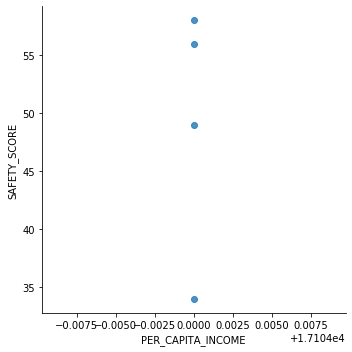

In [37]:
sns.lmplot(x="PER_CAPITA_INCOME", y="SAFETY_SCORE", data=q1);

#### There is no relationship between PER_CAPITA INCOME and SAFETY_SCORE with slope of 0.

## Q2 What is the relationship between enviroment score and hardship-index of schools that based on for schools with per capita income greater than 15000

In [38]:
sql = '''SELECT Environment_Score, HARDSHIP_INDEX FROM Totaldata WHERE PER_CAPITA_INCOME>15000'''
q2 = pd.read_sql(sql, conn)
q2

,Environment_Score,HARDSHIP_INDEX
0,53.0,70.0
1,44.0,69.0
2,43.0,17.0
3,18.0,37.0
4,50.0,15.0
...,...,...
306,48.0,1.0
307,37.0,70.0
308,53.0,42.0
309,41.0,46.0


In [39]:
x = q2['Environment_Score'].values.reshape(-1,1)
y = q2['HARDSHIP_INDEX'].values.reshape(-1,1)
linear_regression = LinearRegression()
fit = linear_regression.fit(x,y)
print(fit.coef_)
print(fit.intercept_)

[[-0.28318272]]
[55.02024999]


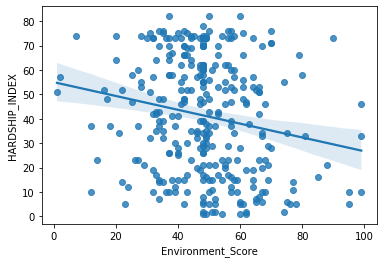

In [40]:
sns.regplot(x="Environment_Score", y="HARDSHIP_INDEX",data=q2,fit_reg=True)

#### There's slight evidence that HARDSHIP_INDEX decreases with increase in ENVIRONMENT_SCORE with slope of -0.283

### Q3 How do safety scores of school vary from different areas of the city 

In [41]:
sql = """Select COMMUNITY_AREA_NAME, sum(SAFETY_SCORE) from Totaldata group by COMMUNITY_AREA_NAME"""
q3 = pd.read_sql(sql,conn)
q3

,COMMUNITY_AREA_NAME,sum(SAFETY_SCORE)
0,ALBANY PARK,435.0
1,ARCHER HEIGHTS,48.0
2,ARMOUR SQUARE,130.0
3,ASHBURN,360.0
4,AUBURN GRESHAM,307.0
5,AUSTIN,734.0
6,AVALON PARK,57.0
7,AVONDALE,225.0
8,BELMONT CRAGIN,519.0
9,BEVERLY,282.0


In [42]:
q3.describe()

,sum(SAFETY_SCORE)
count,74.000000
mean,292.702703
std,183.402972
min,28.000000
25%,156.250000
50%,260.000000
75%,384.750000
max,925.000000


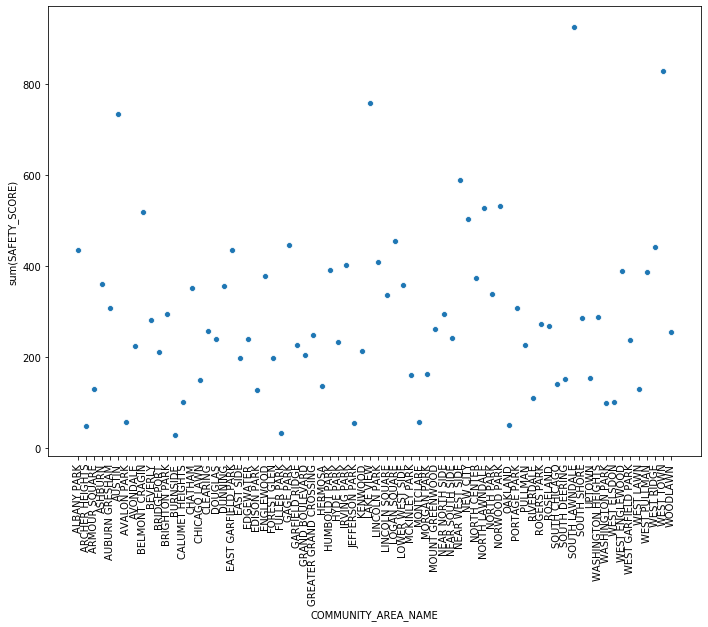

In [43]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
p = sns.scatterplot(data=q3, x="COMMUNITY_AREA_NAME", y="sum(SAFETY_SCORE)")
p = plt.setp(p.get_xticklabels(), rotation=90)

#### The mean of safety score amount all schools from all city is ~292 with a S.D of ~183 but according to the scatter plot we can see that it randomly scatterred

## Q4 Determine relationship between Instruction_Score to Average_Teacher_Attendence

In [44]:
sql = "Select CAST(Average_Teacher_Attendance as INT), Instruction_Score from Totaldata"
q4 = pd.read_sql(sql, conn)
q4

,CAST(Average_Teacher_Attendance as INT),Instruction_Score
0,94,51.0
1,95,19.0
2,96,80.0
3,95,41.0
4,95,42.0
...,...,...
427,0,41.0
428,0,58.0
429,0,28.0
430,0,63.0


In [45]:
x = q4['CAST(Average_Teacher_Attendance as INT)'].values.reshape(-1,1)
y = q4['Instruction_Score'].values.reshape(-1,1)
linear_regression = LinearRegression()
fit = linear_regression.fit(x,y)
print(fit.coef_)
print(fit.intercept_)

[[-0.03777897]]
[52.95268932]


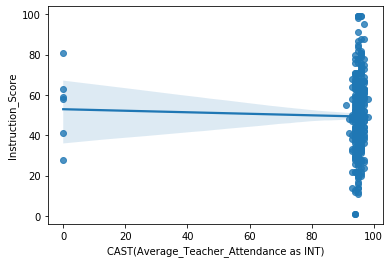

In [46]:
sns.regplot(x="CAST(Average_Teacher_Attendance as INT)", y="Instruction_Score",data=q4,fit_reg=True)

#### From the linear regression and regression plot we can see that there is no relationship between Average_Attendence and institution score

## Q5 Is the relationship between PERCENT_HOUSEHOLDS_BELOW_POVERTY between different cities normally distributed

In [47]:
sql = " SELECT PERCENT_HOUSEHOLDS_BELOW_POVERTY, COMMUNITY_AREA_NAME FROM Totaldata "
q5 = pd.read_sql(sql,conn)
q5_2 = q5.pivot(columns='COMMUNITY_AREA_NAME',values='PERCENT_HOUSEHOLDS_BELOW_POVERTY')


In [48]:
q5_2.describe()

COMMUNITY_AREA_NAME,ALBANY PARK,ARCHER HEIGHTS,ARMOUR SQUARE,ASHBURN,AUBURN GRESHAM,AUSTIN,AVALON PARK,AVONDALE,BELMONT CRAGIN,BEVERLY,BRIDGEPORT,BRIGHTON PARK,BURNSIDE,CALUMET HEIGHTS,CHATHAM,CHICAGO LAWN,CLEARING,DOUGLAS,DUNNING,EAST GARFIELD PARK,EAST SIDE,EDGEWATER,EDISON PARK,ENGLEWOOD,FOREST GLEN,FULLER PARK,GAGE PARK,GARFIELD RIDGE,GRAND BOULEVARD,GREATER GRAND CROSSING,HERMOSA,HUMBOLDT PARK,HYDE PARK,IRVING PARK,JEFFERSON PARK,KENWOOD,LAKE VIEW,LINCOLN PARK,LINCOLN SQUARE,LOGAN SQUARE,LOWER WEST SIDE,MCKINLEY PARK,MONTCLARE,MORGAN PARK,MOUNT GREENWOOD,NEAR NORTH SIDE,NEAR SOUTH SIDE,NEAR WEST SIDE,NEW CITY,NORTH CENTER,NORTH LAWNDALE,NORTH PARK,NORWOOD PARK,OAKLAND,PORTAGE PARK,PULLMAN,RIVERDALE,ROGERS PARK,ROSELAND,SOUTH CHICAGO,SOUTH DEERING,SOUTH LAWNDALE,SOUTH SHORE,UPTOWN,WASHINGTON HEIGHTS,WASHINGTON PARK,WEST ELSDON,WEST ENGLEWOOD,WEST GARFIELD PARK,WEST LAWN,WEST PULLMAN,WEST RIDGE,WEST TOWN,WOODLAWN
count,7.0,1.0,3.0,8.0,9.000000e+00,1.800000e+01,2.0,4.0,1.000000e+01,4.0,4.0,6.000000e+00,1.0,2.0,6.0,5.0,4.0,5.0,5.0,9.0,4.0,4.0,2.0,1.100000e+01,2.0,1.0,8.000000e+00,4.0,6.0,7.000000e+00,3.0,9.0,4.0,7.000000e+00,1.0,5.0,1.000000e+01,5.0,5.0,9.0,7.000000e+00,3.0,1.0,4.0,3.0,5.0,3.000000e+00,1.200000e+01,13.0,5.0,1.000000e+01,4.0,7.000000e+00,1.0,5.0,4.0,3.0,6.000000e+00,8.0,5.0,3.0,19.0,7.000000e+00,3.0,8.000000e+00,4.0,2.0,1.200000e+01,7.000000e+00,2.0,10.0,6.0,1.300000e+01,7.000000e+00
mean,19.2,14.1,40.1,10.4,2.760000e+01,2.860000e+01,17.2,15.3,1.870000e+01,5.1,18.9,2.360000e+01,33.0,11.5,27.8,27.9,8.9,29.6,10.6,42.4,19.2,18.2,3.3,4.660000e+01,7.5,51.2,2.340000e+01,8.8,29.3,2.960000e+01,20.5,33.9,18.4,1.310000e+01,8.6,21.7,1.140000e+01,12.3,10.9,16.8,2.580000e+01,18.7,15.3,13.2,3.4,12.9,1.380000e+01,2.060000e+01,29.0,7.5,4.310000e+01,13.2,5.400000e+00,39.7,11.6,21.6,56.5,2.360000e+01,19.8,29.8,29.2,30.7,3.110000e+01,24.0,1.690000e+01,42.1,15.6,3.440000e+01,4.170000e+01,14.9,25.9,17.2,1.470000e+01,3.070000e+01
std,0.0,NaN,0.0,0.0,3.768222e-15,7.311424e-15,0.0,0.0,3.744889e-15,0.0,0.0,3.891803e-15,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.490447e-14,0.0,NaN,3.798011e-15,0.0,0.0,3.837369e-15,0.0,0.0,0.0,1.918685e-15,NaN,0.0,1.872445e-15,0.0,0.0,0.0,3.837369e-15,0.0,NaN,0.0,0.0,0.0,2.175584e-15,3.710688e-15,0.0,0.0,7.489778e-15,0.0,9.593423e-16,NaN,0.0,0.0,0.0,3.891803e-15,0.0,0.0,0.0,0.0,3.837369e-15,0.0,3.798011e-15,0.0,0.0,7.421377e-15,7.674739e-15,0.0,0.0,0.0,1.848891e-15,3.837369e-15
min,19.2,14.1,40.1,10.4,2.760000e+01,2.860000e+01,17.2,15.3,1.870000e+01,5.1,18.9,2.360000e+01,33.0,11.5,27.8,27.9,8.9,29.6,10.6,42.4,19.2,18.2,3.3,4.660000e+01,7.5,51.2,2.340000e+01,8.8,29.3,2.960000e+01,20.5,33.9,18.4,1.310000e+01,8.6,21.7,1.140000e+01,12.3,10.9,16.8,2.580000e+01,18.7,15.3,13.2,3.4,12.9,1.380000e+01,2.060000e+01,29.0,7.5,4.310000e+01,13.2,5.400000e+00,39.7,11.6,21.6,56.5,2.360000e+01,19.8,29.8,29.2,30.7,3.110000e+01,24.0,1.690000e+01,42.1,15.6,3.440000e+01,4.170000e+01,14.9,25.9,17.2,1.470000e+01,3.070000e+01
25%,19.2,14.1,40.1,10.4,2.760000e+01,2.860000e+01,17.2,15.3,1.870000e+01,5.1,18.9,2.360000e+01,33.0,11.5,27.8,27.9,8.9,29.6,10.6,42.4,19.2,18.2,3.3,4.660000e+01,7.5,51.2,2.340000e+01,8.8,29.3,2.960000e+01,20.5,33.9,18.4,1.310000e+01,8.6,21.7,1.140000e+01,12.3,10.9,16.8,2.580000e+01,18.7,15.3,13.2,3.4,12.9,1.380000e+01,2.060000e+01,29.0,7.5,4.310000e+01,13.2,5.400000e+00,39.7,11.6,21.6,56.5,2.360000e+01,19.8,29.8,29.2,30.7,3.110000e+01,24.0,1.690000e+01,42.1,15.6,3.440000e+01,4.170000e+01,14.9,25.9,17.2,1.470000e+01,3.070000e+01
50%,19.2,14.1,40.1,10.4,2.760000e+01,2.860000e+01,17.2,15.3,1.870000e+01,5.1,18.9,2.360000e+01,33.0,11.5,27.8,27.9,8.9,29.6,10.6,42.4,19.2,18.2,3.3,4.660000e+01,7.5,51.2,2.340000e+01,8.8,29.3,2.960000e+01,20.5,33.9,18.4,1.310000e+01,8.6,21.7,1.140000e+01,12.3,10.9,16.8,2.580000e+01,18.7,15.3,13.2,3.4,12.9,1.380000e+01,2.060000e+01,29.0,7.5,4.310000e+01,13.2,5.400000e+00,39.7,11.6,21.6,56.5,2.360000e+01,19.8,29.8,29.2,30.7,3.110000e+01,24.0,1.690000e+01,42.1,15.6,3.440000e+01,4.17

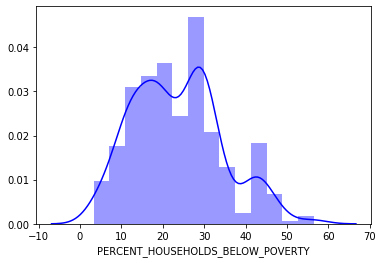

In [49]:
sns.distplot(q5['PERCENT_HOUSEHOLDS_BELOW_POVERTY'], color='b')

#### The percent households is not normally distributed between different cities

## Q6 Find the relationship between per_capita income to number of schools in each community area

In [50]:
sql = "SELECT COMMUNITY_AREA_NAME, sum(PER_CAPITA_INCOME), count(SCHOOL_ID) from Totaldata group by COMMUNITY_AREA_NAME"
q6 = pd.read_sql(sql, conn)
q6

,COMMUNITY_AREA_NAME,sum(PER_CAPITA_INCOME),count(SCHOOL_ID)
0,ALBANY PARK,149261,7
1,ARCHER HEIGHTS,16134,1
2,ARMOUR SQUARE,48444,3
3,ASHBURN,187856,8
4,AUBURN GRESHAM,139752,9
5,AUSTIN,287226,18
6,AVALON PARK,48908,2
7,AVONDALE,80156,4
8,BELMONT CRAGIN,154610,10
9,BEVERLY,158092,4


In [51]:
x = q6['count(SCHOOL_ID)'].values.reshape(-1,1)
y = q6['sum(PER_CAPITA_INCOME)'].values.reshape(-1,1)
linear_regression = LinearRegression()
fit = linear_regression.fit(x,y)
print(fit.coef_)
print(fit.intercept_)

[[17677.08381689]]
[36615.5377176]


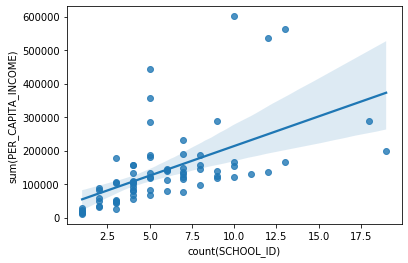

In [52]:
sns.regplot(x="count(SCHOOL_ID)", y="sum(PER_CAPITA_INCOME)",data=q6,fit_reg=True)

#### There's a strong positive linear relationship between the number of school in an area to the per_capita_income

## Q7 What is the relationship between safety scores of schools in "AUSTIN" and "ENGLEWOOD"

In [53]:
sql = """SELECT SAFETY_SCORE, COMMUNITY_AREA_NAME FROM Totaldata WHERE COMMUNITY_AREA_NAME='AUSTIN'
or COMMUNITY_AREA_NAME='ENGLEWOOD'"""
q7 = pd.read_sql(sql,conn)
q7_2 = q7.pivot(columns='COMMUNITY_AREA_NAME',values='SAFETY_SCORE')


In [54]:
q7_2.describe()

COMMUNITY_AREA_NAME,AUSTIN,ENGLEWOOD
count,18.000000,11.000000
mean,40.777778,34.363636
std,12.221272,13.994804
min,21.000000,18.000000
25%,32.000000,25.500000
50%,38.000000,30.000000
75%,44.000000,41.500000
max,68.000000,62.000000


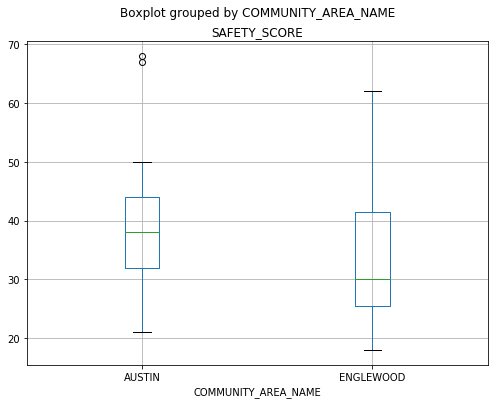

In [55]:
q7.boxplot(column="SAFETY_SCORE", by="COMMUNITY_AREA_NAME", figsize=(8,6))
plt.show()

#### The average safety score of schools in the AUSTIN area is better than that of ENGLEWOOD

# Q8 What is the relationship between PERCENT_AGED_16_UNEMPLOYED and Instruction_Score for schools with safety score over 60?

In [61]:
q8 = "SELECT PERCENT_AGED_16_UNEMPLOYED, INSTRUCTION_Score FROM Totaldata where SAFETY_SCORE > 60.0"
q8 = pd.read_sql(q8,conn)
q8

,PERCENT_AGED_16_UNEMPLOYED,Instruction_Score
0,17.3,80.0
1,4.7,43.0
2,20.3,49.0
3,9.9,34.0
4,9.9,88.0
...,...,...
106,6.6,52.0
107,9.0,49.0
108,5.2,51.0
109,8.8,28.0


In [64]:
x = q8['Instruction_Score'].values.reshape(-1,1)
y = q8['PERCENT_AGED_16_UNEMPLOYED'].values.reshape(-1,1)
linear_regression = LinearRegression()
fit = linear_regression.fit(x,y)
print(fit.coef_)
print(fit.intercept_)

[[0.07900946]]
[6.15279682]


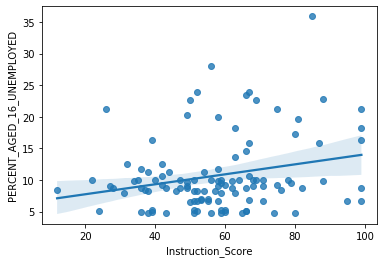

In [65]:
sns.regplot(x="Instruction_Score", y="PERCENT_AGED_16_UNEMPLOYED",data=q8,fit_reg=True)

#### There's not a strong linear relationship between instruction scores and percent_aged_16_unemployed for schools where safey score is greater than 60.

## Q9 How does PERCENT_OF_HOUSING_CROWDED compare for areas where school safety score is greater than 70.

In [75]:
sql = " SELECT COMMUNITY_AREA_NAME, sum(PERCENT_OF_HOUSING_CROWDED) FROM Totaldata WHERE SAFETY_SCORE > 70 GROUP BY COMMUNITY_AREA_NAME"
q9 = pd.read_sql(sql, conn)
q9

,COMMUNITY_AREA_NAME,sum(PERCENT_OF_HOUSING_CROWDED)
0,ALBANY PARK,22.6
1,BELMONT CRAGIN,10.8
2,BEVERLY,2.7
3,BRIDGEPORT,4.5
4,CHATHAM,6.6
5,CLEARING,5.4
6,DUNNING,5.2
7,EDISON PARK,1.1
8,FOREST GLEN,2.2
9,GAGE PARK,15.8


In [76]:
q9.describe()

,sum(PERCENT_OF_HOUSING_CROWDED)
count,30.000000
mean,6.840000
std,5.742798
min,0.900000
25%,3.050000
50%,5.450000
75%,7.250000
max,23.400000


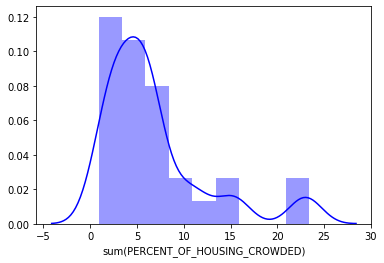

In [78]:
sns.distplot(q9['sum(PERCENT_OF_HOUSING_CROWDED)'], color='b')

#### Percentage of crowded housing is most likely between 0-10% for schools with safety scores greater than 70.

# Q10 is there a relationship between community hardship to school environmental scores for school who's safety score is less than 50?

In [79]:
sql = "SELECT HARDSHIP_INDEX, Environment_Score From Totaldata Where SAFETY_SCORE < 50"
q10 = pd.read_sql(sql, conn)
q10

,HARDSHIP_INDEX,Environment_Score
0,91.0,32.0
1,37.0,18.0
2,15.0,50.0
3,89.0,39.0
4,39.0,34.0
...,...,...
203,96.0,47.0
204,80.0,39.0
205,15.0,38.0
206,94.0,55.0


In [80]:
x = q10['Environment_Score'].values.reshape(-1,1)
y = q10['HARDSHIP_INDEX'].values.reshape(-1,1)
linear_regression = LinearRegression()
fit = linear_regression.fit(x,y)
print(fit.coef_)
print(fit.intercept_)

[[0.22114077]]
[56.96111156]


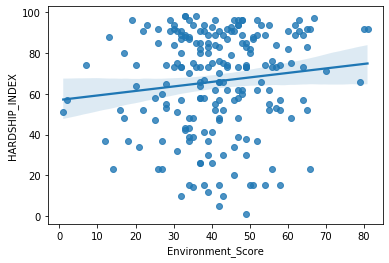

In [82]:
sns.regplot(x="Environment_Score", y="HARDSHIP_INDEX",data=q10,fit_reg=True)

#### There's not a strong linear relationship between school environment scores and Hardship index in the community.